<a href="https://colab.research.google.com/github/niczavadskiy/StrokePredicte/blob/main/StPr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Созданим и обучим нейронную сеть предсказывающую инсульт у пацента. На вход нейронов будут подаваться  входной вектор из параметров состояния пацента, на выходе решая задачу бинарной классификацию получим один из двух ответов. Инсульт ожидается или нет.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/niczavadskiy/LLMStudy/main/healthcare-dataset-stroke-data-2.csv?token=GHSAT0AAAAAACEGXPZZXMSGY2ASPYC6VT72ZEZ7MXA")

Загрузим Датасет с данными о пациентах

Информация об атрибуте: 1) id: уникальный идентификатор 2) gender: "Мужчина", "Женщина" или "Другой" 3) age: возраст пациента 4) hypertension: 0, если у пациента нет гипертонии, 1, если у пациента есть гипертония 5) heart_disease: 0, если у пациента нет есть какие-либо сердечные заболевания, 1 если у пациента есть сердечное заболевание 6) ever_married состоял в браке: "Нет" или "Да" 7) work_type: "дети", "Правительство", "Никогда не работал", "Частный" или "Самозанятый" 8) Residence_type: "Сельский" или "городской" 9) avg_glucose_level: средний уровень глюкозы в крови 10) bmi: индекс массы тела 11) smoking_status: "ранее курил", "никогда не курил", "курит" или "Неизвестно"* 12) stroke: 1, если у пациента был инсульт, или 0, если нет

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [ ]:
X = df.drop(['id'], axis=1)


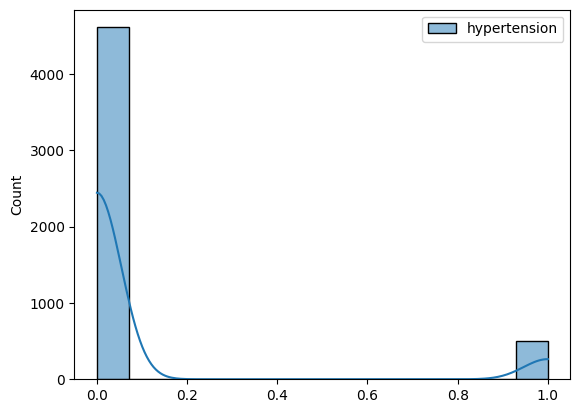

In [ ]:
sns.histplot(df[['hypertension']], kde=True)
plt.show()

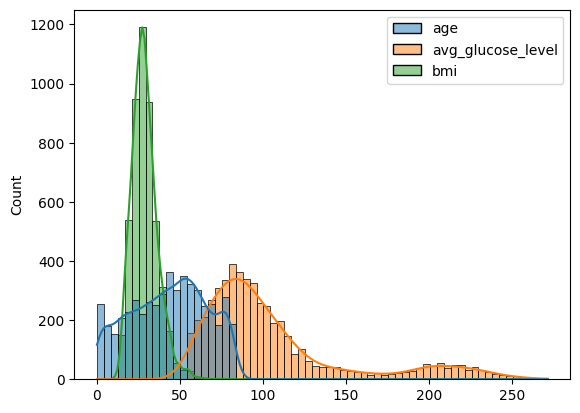

In [ ]:
sns.histplot(df[['age','avg_glucose_level','bmi']], kde=True)
plt.show()

Присвоить средние значение bmi тем записям у которых отсутствует данные по bmi

In [ ]:
mean = df['bmi'].mean()

df['bmi'].fillna(mean, inplace=True)

<Axes: >

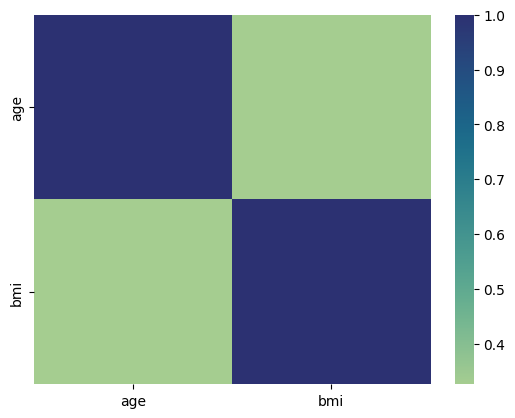

In [ ]:
corr = df[['age', 'bmi']].corr()

sns.heatmap(corr, cmap="crest")

<Axes: >

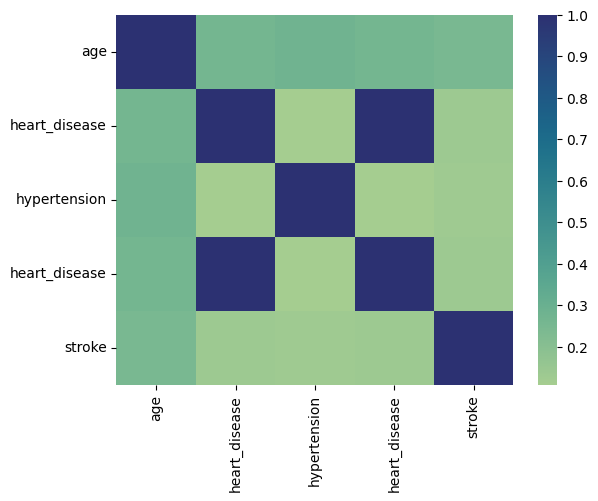

In [ ]:
corr = df[['age', 'heart_disease','hypertension','heart_disease','stroke']].corr()

sns.heatmap(corr, cmap="crest")


In [ ]:
df['gender'].value_counts(dropna=False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df = df[df.gender != 'Other']
df['gender'].value_counts(dropna=False)

Female    4122
Male      2979
Name: gender, dtype: int64

Исключим 1 Other пол, т.к. данных по Other недостаточно для  выделения него отдельного признака

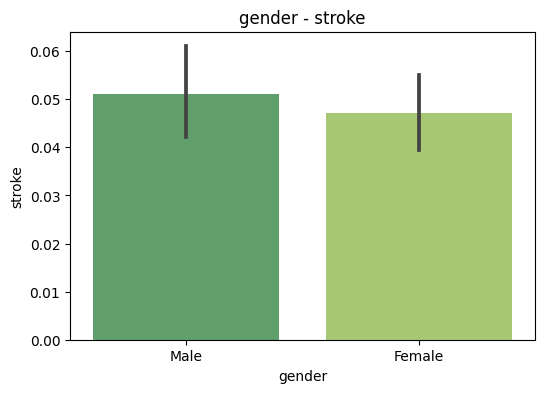

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='stroke', data = df, palette='summer', errorbar='ci')
plt.title('gender - stroke')
plt.show()

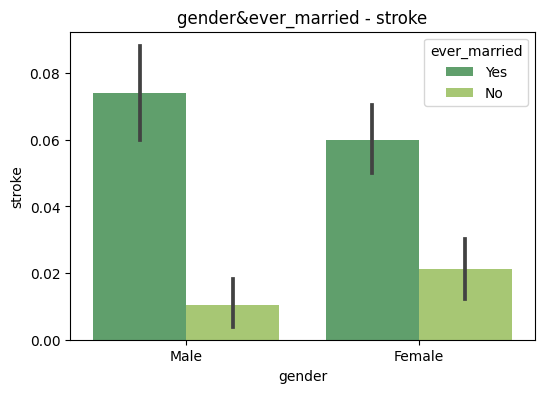

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='stroke', hue='ever_married', data = df, palette='summer')
plt.title('gender&ever_married - stroke')
plt.show()

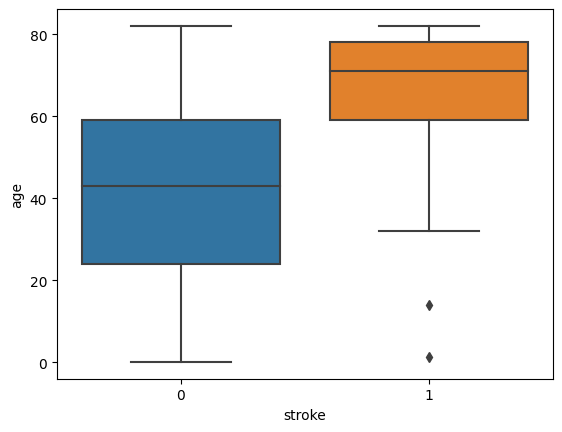

In [ ]:
sns.boxplot(x="stroke", y="age", data=df)
plt.show()

In [ ]:
len(df[df['stroke'] == 0]) / len(df)

0.9512624779800353

Исключим id и выполним маппинг по признакам с типом object

In [ ]:
X = df.drop([	'id','stroke'], axis=1)
y = df['stroke']

In [ ]:
X['gender'] = X['gender'].map({'Male' : 1, 'Female' : 0})
X['ever_married'] = X['ever_married'].map({'Yes' : 1, 'No' : 0})
X['Residence_type'] = X['Residence_type'].map({'Urban' : 1, 'Rural' : 0})

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked
1,0,61.0,0,0,1,Self-employed,0,202.21,29.295213,never smoked
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

X_train.shape, X_test.shape

((5680, 10), (1421, 10))

In [ ]:

X_train.shape, X_test.shape
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3550 entries, 4139 to 2522
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3550 non-null   int64  
 1   age                3550 non-null   float64
 2   hypertension       3550 non-null   int64  
 3   heart_disease      3550 non-null   int64  
 4   ever_married       3550 non-null   int64  
 5   work_type          3550 non-null   object 
 6   Residence_type     3550 non-null   int64  
 7   avg_glucose_level  3550 non-null   float64
 8   bmi                3550 non-null   float64
 9   smoking_status     3550 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 305.1+ KB


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000
mean,0.427324,50.441814,0.145915,0.092676,0.728732,0.523380,113.829777,29.329734
std,0.494760,23.034998,0.353071,0.290019,0.444677,0.499523,52.421061,7.148145
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000
25%,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,77.820000,24.800000
50%,0.000000,54.000000,0.000000,0.000000,1.000000,1.000000,93.970000,29.100000
75%,1.000000,70.000000,0.000000,0.000000,1.000000,1.000000,126.307500,32.800000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,92.000000


Выполним кодирование категориальных признаков 'work_type',	'smoking_status' методом One Hot Encoding, нормализуем размерность и название признаков в датасете

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['work_type',	'smoking_status']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [ ]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.316406,0.0,0.0,0.0,0.0,0.158111,0.108075
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.719238,1.0,0.0,0.0,0.0,0.009879,0.149068
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.987793,0.0,0.0,1.0,0.0,0.123857,0.067081
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243164,0.0,0.0,0.0,1.0,0.210922,0.190062
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.865723,0.0,0.0,1.0,0.0,0.896362,0.233540


In [ ]:
X_train_transformed.info()
X_train_transformed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_type_Never_worked          3550 non-null   float64
 1   work_type_Private               3550 non-null   float64
 2   work_type_Self-employed         3550 non-null   float64
 3   work_type_children              3550 non-null   float64
 4   smoking_status_formerly smoked  3550 non-null   float64
 5   smoking_status_never smoked     3550 non-null   float64
 6   smoking_status_smokes           3550 non-null   float64
 7   gender                          3550 non-null   float64
 8   age                             3550 non-null   float64
 9   hypertension                    3550 non-null   float64
 10  heart_disease                   3550 non-null   float64
 11  ever_married                    3550 non-null   float64
 12  Residence_type                  35

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000
mean,0.002535,0.571549,0.190986,0.100845,0.216620,0.356901,0.154085,0.427324,0.614768,0.145915,0.092676,0.728732,0.523380,0.271027,0.221487
std,0.050294,0.494924,0.393133,0.301166,0.411999,0.479153,0.361081,0.494760,0.281189,0.353071,0.290019,0.444677,0.499523,0.241995,0.088797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414062,0.000000,0.000000,0.000000,0.000000,0.104792,0.165217
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658203,0.000000,0.000000,1.000000,1.000000,0.179346,0.218634
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.853516,0.000000,0.000000,1.000000,1.000000,0.328628,0.264596
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=50)

X_train_transformed.shape, X_test_transformed.shape

((6390, 10), (711, 10))

In [ ]:
X_train_transformed.info()
X_train_transformed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_type_Never_worked          3550 non-null   float64
 1   work_type_Private               3550 non-null   float64
 2   work_type_Self-employed         3550 non-null   float64
 3   work_type_children              3550 non-null   float64
 4   smoking_status_formerly smoked  3550 non-null   float64
 5   smoking_status_never smoked     3550 non-null   float64
 6   smoking_status_smokes           3550 non-null   float64
 7   gender                          3550 non-null   float64
 8   age                             3550 non-null   float64
 9   hypertension                    3550 non-null   float64
 10  heart_disease                   3550 non-null   float64
 11  ever_married                    3550 non-null   float64
 12  Residence_type                  35

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000
mean,0.002535,0.571549,0.190986,0.100845,0.216620,0.356901,0.154085,0.427324,0.614768,0.145915,0.092676,0.728732,0.523380,0.271027,0.221487
std,0.050294,0.494924,0.393133,0.301166,0.411999,0.479153,0.361081,0.494760,0.281189,0.353071,0.290019,0.444677,0.499523,0.241995,0.088797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414062,0.000000,0.000000,0.000000,0.000000,0.104792,0.165217
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658203,0.000000,0.000000,1.000000,1.000000,0.179346,0.218634
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.853516,0.000000,0.000000,1.000000,1.000000,0.328628,0.264596
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_transformed, y_train)

pred = model.predict(X_test_transformed)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[2106,  350],
       [ 409,  686]])

In [ ]:
X_train_transformed.info()
X_train_transformed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_type_Never_worked          3550 non-null   float64
 1   work_type_Private               3550 non-null   float64
 2   work_type_Self-employed         3550 non-null   float64
 3   work_type_children              3550 non-null   float64
 4   smoking_status_formerly smoked  3550 non-null   float64
 5   smoking_status_never smoked     3550 non-null   float64
 6   smoking_status_smokes           3550 non-null   float64
 7   gender                          3550 non-null   float64
 8   age                             3550 non-null   float64
 9   hypertension                    3550 non-null   float64
 10  heart_disease                   3550 non-null   float64
 11  ever_married                    3550 non-null   float64
 12  Residence_type                  35

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000
mean,0.002535,0.571549,0.190986,0.100845,0.216620,0.356901,0.154085,0.427324,0.614768,0.145915,0.092676,0.728732,0.523380,0.271027,0.221487
std,0.050294,0.494924,0.393133,0.301166,0.411999,0.479153,0.361081,0.494760,0.281189,0.353071,0.290019,0.444677,0.499523,0.241995,0.088797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414062,0.000000,0.000000,0.000000,0.000000,0.104792,0.165217
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658203,0.000000,0.000000,1.000000,1.000000,0.179346,0.218634
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.853516,0.000000,0.000000,1.000000,1.000000,0.328628,0.264596
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)


0.7862573922838637

In [ ]:
y_test.value_counts()

0    2456
1    1095
Name: stroke, dtype: int64

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, pred)

0.6264840182648402

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, pred)

0.6621621621621622

In [ ]:
probs = model.predict_proba(X_test_transformed)

probs[:5]

array([[0.7446471 , 0.2553529 ],
       [0.48893146, 0.51106854],
       [0.97159786, 0.02840214],
       [0.64816508, 0.35183492],
       [0.70819239, 0.29180761]])

In [ ]:
model.coef_

array([[-0.14864978,  0.21316378, -0.06600159,  0.53599478,  0.06525921,
        -0.31936671,  0.0527258 , -0.12165007,  5.68936519,  0.47353927,
         0.32223562, -0.1297291 ,  0.12969448,  0.75130007,  0.57376946]])

In [ ]:
classes = pred > 0.4

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[2106,  350],
        [ 409,  686]]),
 0.6264840182648402)

In [ ]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importances

,weights,features
5,-0.319367,smoking_status_never smoked
0,-0.148650,work_type_Never_worked
11,-0.129729,ever_married
7,-0.121650,gender
2,-0.066002,work_type_Self-employed
6,0.052726,smoking_status_smokes
4,0.065259,smoking_status_formerly smoked
12,0.129694,Residence_type
1,0.213164,work_type_Private
10,0.322236,heart_disease


In [ ]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

#а так модель можно загрузить из файла:
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)